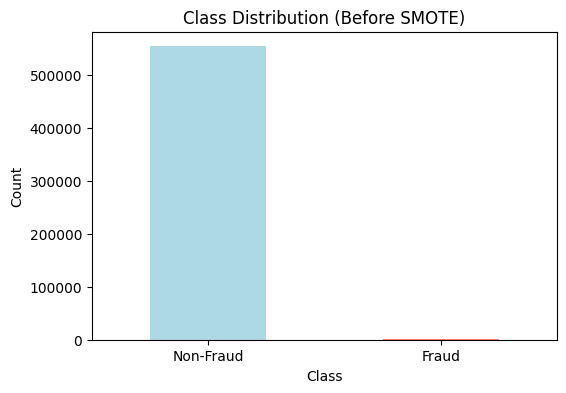

Class distribution in training data:
is_fraud
0    442859
1      1716
Name: count, dtype: int64
Class distribution after SMOTE:
is_fraud
0    442859
1    442859
Name: count, dtype: int64


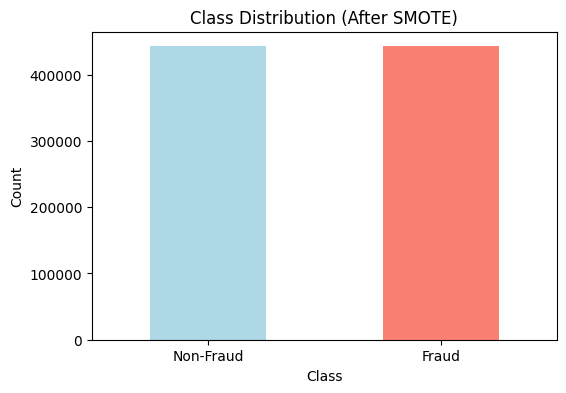

Confusion Matrix:
[[108973   1742]
 [    55    374]]

Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      0.98      0.99    110715
       Fraud       0.18      0.87      0.29       429

    accuracy                           0.98    111144
   macro avg       0.59      0.93      0.64    111144
weighted avg       1.00      0.98      0.99    111144


AUC-ROC Score: 0.9844

Feature Importances:
       Feature  Importance
2          amt    0.608010
1     category    0.135753
11   unix_time    0.055094
9     city_pop    0.032219
5        state    0.022035
10         job    0.021983
7          lat    0.021053
6          zip    0.017756
4         city    0.017422
8         long    0.017414
0     merchant    0.015050
12   merch_lat    0.012750
13  merch_long    0.012694
3       gender    0.010767


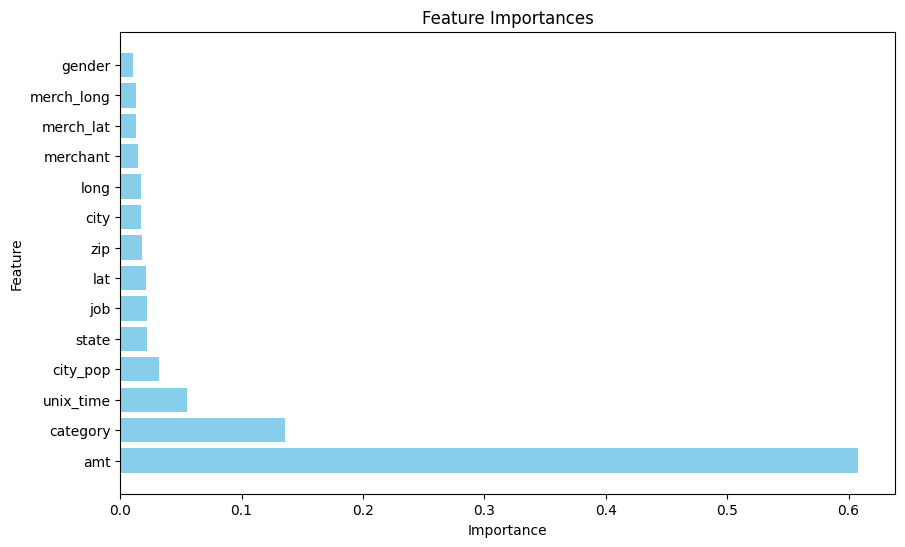

In [6]:
# pip install pandas numpy scikit-learn imbalanced-learn joblib
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

# Step 1: Load the dataset
# Replace 'fraudTest.csv' with your file path
data = pd.read_csv(r"E:\fraudTest.csv")

# Step 2: Data Cleaning and Preprocessing
# Drop unnecessary columns
columns_to_drop = ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'first', 
                   'last', 'street', 'trans_num', 'dob']
data_cleaned = data.drop(columns=columns_to_drop, axis=1)

# Encode categorical variables
categorical_cols = ['merchant', 'category', 'gender', 'city', 'state', 'job']
data_encoded = data_cleaned.copy()
for col in categorical_cols:
    data_encoded[col] = LabelEncoder().fit_transform(data_encoded[col])

# Separate features and target variable
X = data_encoded.drop('is_fraud', axis=1)
y = data_encoded['is_fraud']

# Step 3: Visualize the class distribution of the target variable (before SMOTE)
plt.figure(figsize=(6, 4))
y.value_counts().plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Class Distribution (Before SMOTE)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'], rotation=0)
plt.show()

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Check class imbalance in training data
print(f"Class distribution in training data:\n{y_train.value_counts()}")

# Step 5: Address Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Class distribution after SMOTE:\n{pd.Series(y_train_resampled).value_counts()}")

# Visualize the class distribution of the target variable (after SMOTE)
plt.figure(figsize=(6, 4))
pd.Series(y_train_resampled).value_counts().plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Class Distribution (After SMOTE)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'], rotation=0)
plt.show()

# Step 6: Train the Random Forest Classifier
rf_model = RandomForestClassifier(
    random_state=42, n_estimators=200, max_depth=15, class_weight="balanced")
rf_model.fit(X_train_resampled, y_train_resampled)

# Step 7: Evaluate the Model
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
classification_rep = classification_report(y_test, y_pred, target_names=["Non-Fraud", "Fraud"])
print("\nClassification Report:")
print(classification_rep)

# AUC-ROC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nAUC-ROC Score: {roc_auc:.4f}")

# Step 8: Feature Importance
feature_importances = pd.DataFrame({
    'Feature': data_encoded.drop('is_fraud', axis=1).columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)

# Step 9: Visualize Feature Importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
